# Chapter 3: Linear methods for regression

## 3.1: Linear regression models and least squares

In [1]:
# Import dependent packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import scale
import scipy as sp
from scipy import linalg
plt.style.use('seaborn')

Data for regression problems comes in the form of a set of
$P$ input/output observation pairs

\begin{equation}
\left(\mathbf{x}_{1},y_{1}\right),\,\left(\mathbf{x}_{2},y_{2}\right),\,...,\,\left(\mathbf{x}_{P},y_{P}\right)
\end{equation}

or $\left\{ \left(\mathbf{x}_{p},y_{p}\right)\right\} _{p=1}^{P}$ for short, where $\mathbf{x}_{p}$ and $y_{p}$ denote the $p^{\textrm{th}}$ input and output respectively. The linear regression model has the form:

$$ f(X) = \beta_0 +  \sum_{j=1}^{p} X_j \beta_j $$

The $\beta_j$'s are unknown parameters, and the $X_j$'s are non-random (observed) data. We need to estimate the parameters $\beta_j$ from a set of training data 
\begin{equation}
\left(\mathbf{x}_{1},y_{1}\right),\,\left(\mathbf{x}_{2},y_{2}\right),\,...,\,\left(\mathbf{x}_{P},y_{P}\right)
\end{equation}

The most popular estimation method is ordinary least squares (OLS), in which we minimize the residual sum of squares (loss function) based on the coefficients $\beta = (\beta_0, \beta_1,...,\beta_p)^T$:

$$ RSS(\beta) =\sum_{i=1}^{N} (y_i - f(x_i))^2 = \sum_{i=1}^{N} (y_i - \sum_{j=1}^{p} X_j \beta_j)^2 $$

Let's denote X as $N \times(p+1)$ matrix, and similarly let $y$ be the $N$-vector of outputs in the training data. Then we can write our loss function in matrix form:

$$ RSS(\beta) = (y-X\beta)^T(y-X\beta) $$

This is a quadratic function, differentiating with resect to $\beta$ we obtain:
\begin{equation}
 \frac{\partial RSS}{\partial \beta} = -2X^T(y-X\beta)	
\end{equation}
In order to get minimum value of RSS, we set the first derivative to zero:
\begin{equation}
 X^T(y-X\beta) = 0
\end{equation}
\begin{equation}
 X^Ty - X^TX\beta = 0
\end{equation}
\begin{equation}
\hat{\beta} =(\mathrm{X^TX})^{-1}X^Ty 
\end{equation}

The predicted values can be obtained:
\begin{equation}
\hat{y} = X(\mathrm{X^TX})^{-1}X^Ty 
\end{equation}
The matrix $H = X(\mathrm{X^TX}^{-1})X$ is called the "Hat" matrix.

Let's implement OLS estimation in Python:

In [2]:
### Function takes two feature transform methods: normalization and MiniMaxScale
def feature_prerpocess(data, form = 'normal'):
    if form == "normal":
        new_data = scale(data)
    elif form == "MinMax":
        new_data = minmax_scale(data)
    return pd.DataFrame(new_data)

We will use "Seoul Bike" dataset, it can can be downloaded:
* <a href="https://www.kaggle.com/c/seoul-bike-rental-prediction/data">Seoul Bike Rental Prediction
    
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information. The target variable is a bike count required at each hour.

In [3]:
#Download data 
Seoul_bike = pd.read_csv('SeoulBikeData.csv', sep=',', encoding= 'unicode_escape')
Seoul_bike

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


As we can see there are one date, three categorical and ten continous/integer variables and 8760 observations. For simplicity I dropped date variable, as time series data requires some additional approaches in building a model.
The dependent variable is the number of bikes rented per hour.

In [4]:
X_matrix = Seoul_bike.iloc[:100, 2:10]
X_matrix

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm)
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0
...,...,...,...,...,...,...,...,...
95,23,-5.8,44,2.4,2000,-16.1,0.0,0.0
96,0,-6.1,42,2.6,2000,-16.9,0.0,0.0
97,1,-6.5,41,2.8,2000,-17.6,0.0,0.0
98,2,-6.8,41,2.5,2000,-17.8,0.0,0.0


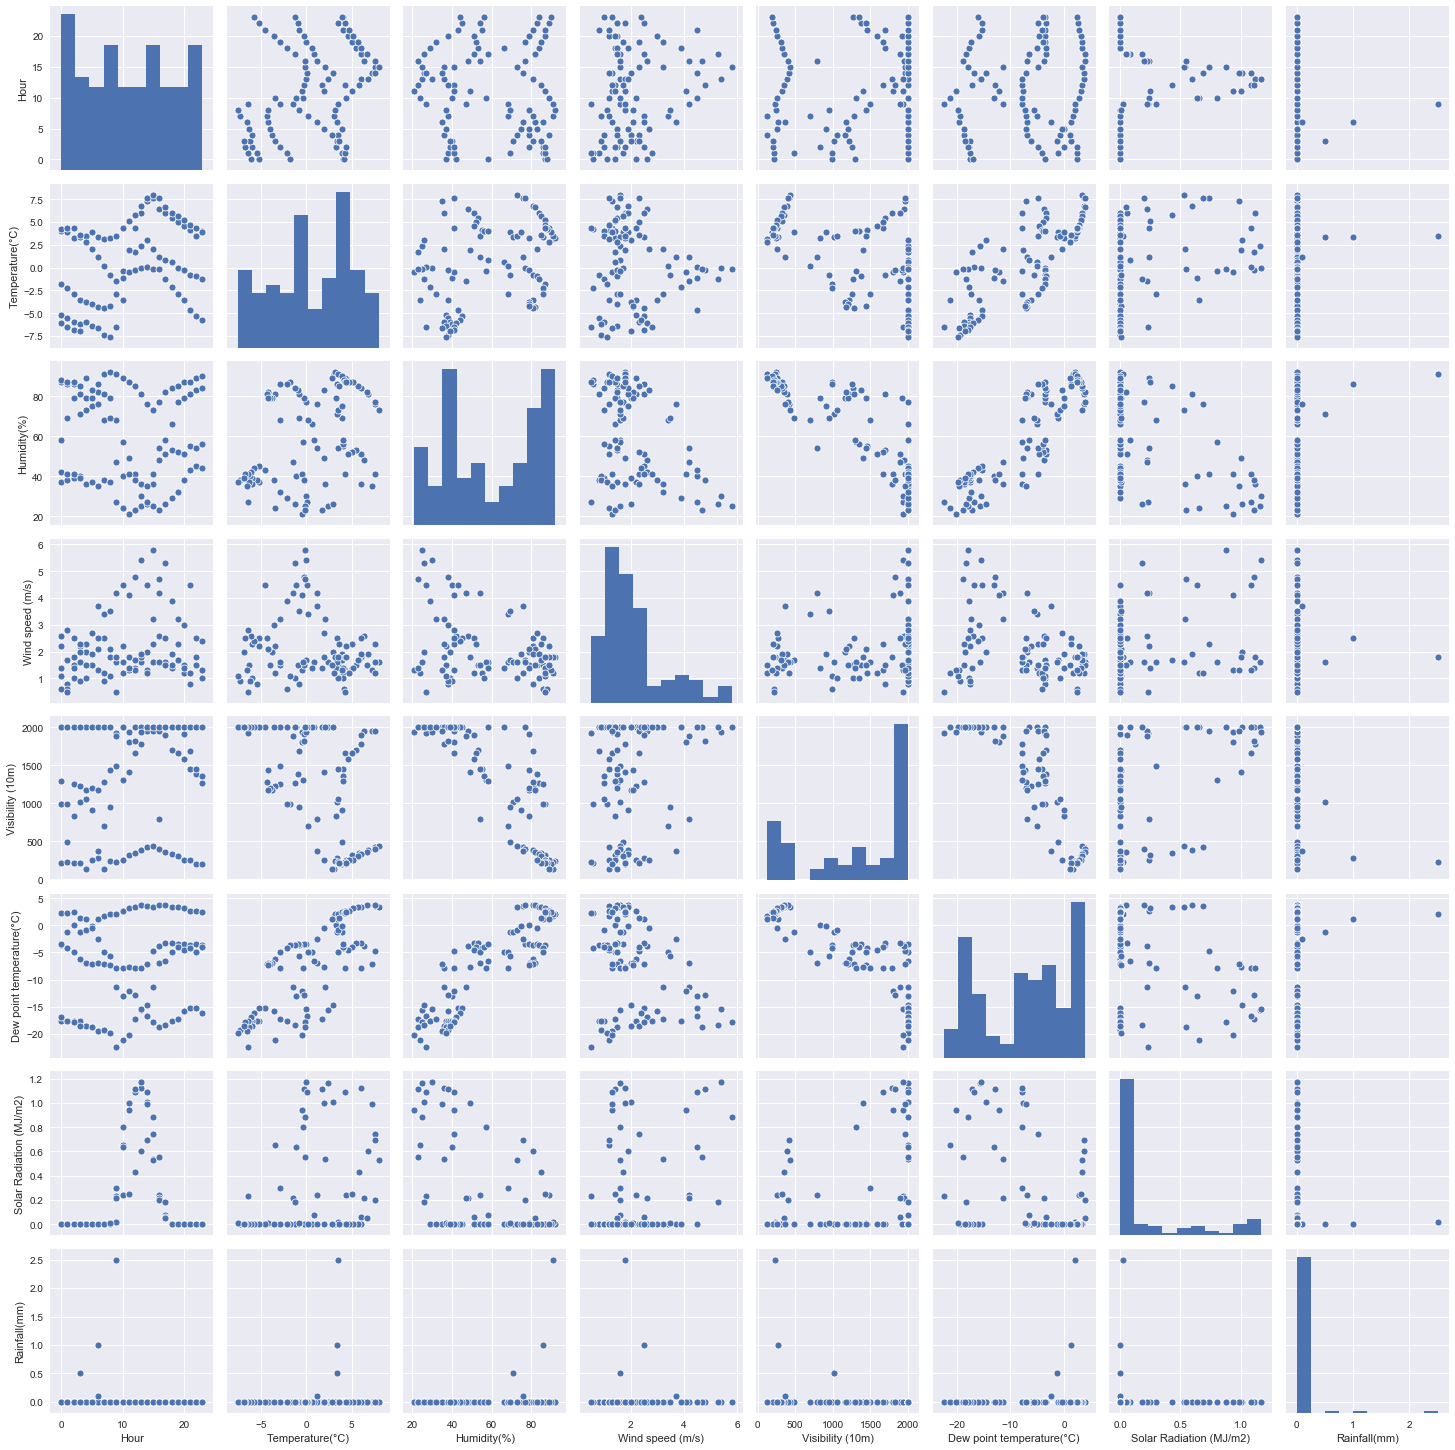

In [5]:
sns.pairplot(X_matrix)

In [6]:
y_var = Seoul_bike.iloc[:100, 1:2]
y_var

,Rented Bike Count
0,254
1,204
2,173
3,107
4,78
...,...
95,248
96,216
97,198
98,124


In [7]:
# Scale the data
X_matrix = feature_prerpocess(X_matrix, form = 'normal')
y_var = feature_prerpocess(y_var, form = 'normal')

The first column of 1's in the design matrix allows estimation of the y-intercept, so we add a new column to our data matrix $X$:

In [8]:
X_matrix.insert(0,'intercept',np.ones((len(X_matrix),)).T)
X_matrix

,intercept,0,1,2,3,4,5,6,7
0,1.0,-1.571507,-1.321402,-1.001076,0.091530,0.971942,-1.300494,-0.593073,-0.151314
1,1.0,-1.429929,-1.390189,-0.956937,-1.117361,0.971942,-1.300494,-0.593073,-0.151314
2,1.0,-1.288352,-1.504835,-0.912797,-0.944662,0.971942,-1.313073,-0.593073,-0.151314
3,1.0,-1.146775,-1.550693,-0.868658,-1.031011,0.971942,-1.300494,-0.593073,-0.151314
4,1.0,-1.005198,-1.504835,-1.045215,0.177880,0.971942,-1.426279,-0.593073,-0.151314
...,...,...,...,...,...,...,...,...,...
95,1.0,1.684768,-1.458977,-0.692102,0.264229,0.971942,-1.111816,-0.593073,-0.151314
96,1.0,-1.571507,-1.527764,-0.780380,0.436928,0.971942,-1.212444,-0.593073,-0.151314
97,1.0,-1.429929,-1.619480,-0.824519,0.609626,0.971942,-1.300494,-0.593073,-0.151314
98,1.0,-1.288352,-1.688267,-0.824519,0.350578,0.971942,-1.325651,-0.593073,-0.151314


In [9]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_matrix, y_var, test_size=0.30)

Below we compute OLS estimator for paramaters $\beta = (\beta_0, \beta_1,...,\beta_p)^T$:

In [10]:
# Paramater estimation:
beta = (linalg.inv(X_train.T@X_train))@X_train.T@y_train
beta.columns  = ['Coefficient']
beta

,Coefficient
0,-0.018572
1,0.369438
2,-0.589199
3,-1.099962
4,-0.008442
5,0.127745
6,1.475690
7,0.146362
8,-0.296550


In [11]:
# Residual sum of squares (RSS)
RSS = (np.subtract(y_train, X_train.dot(beta.to_numpy()))).T@(np.subtract(y_train, X_train.dot(beta.to_numpy())))
RSS

,0
0,42.171523


In [12]:
# "Hat" matrix
H = X_train@(linalg.inv(X_train.T@X_train))@X_train.to_numpy().T
H

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
3,0.098881,0.030556,0.001782,-0.014182,0.005706,0.027289,-0.031366,-0.002365,0.007698,-0.025783,...,0.031948,-0.015293,-0.008969,-0.007736,-0.001335,0.072183,0.008550,0.098230,-0.013946,-0.016055
92,0.030556,0.089359,0.025588,-0.012621,0.040015,0.008786,0.009619,0.022928,-0.002328,0.036292,...,-0.034117,0.009405,-0.002273,-0.020833,0.021475,0.037879,-0.016822,0.026541,0.016161,0.012357
79,0.001782,0.025588,0.085364,0.022059,0.009360,0.008370,0.016471,0.051958,0.011330,0.010580,...,-0.014730,0.047455,0.069588,0.057262,0.007570,0.025427,0.014296,0.003501,0.089846,0.044917
59,-0.014182,-0.012621,0.022059,0.052784,-0.003073,0.013806,0.006716,-0.013705,0.020558,-0.002627,...,0.028732,0.005619,0.041591,0.043581,-0.004655,-0.017950,0.016264,-0.015120,0.028297,-0.008187
43,0.005706,0.040015,0.009360,-0.003073,0.117738,-0.021698,-0.032395,0.042309,-0.037213,0.010869,...,-0.031089,-0.023125,-0.008299,0.003967,0.049375,0.011856,-0.022981,0.008329,-0.001763,0.010760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.072183,0.037879,0.025427,-0.017950,0.011856,0.010161,-0.002642,0.026133,0.008795,0.019320,...,0.013572,0.000580,0.010052,0.008399,0.011651,0.070163,0.012552,0.074081,0.016094,0.012049
27,0.008550,-0.016822,0.014296,0.016264,-0.022981,0.044400,0.018109,0.034949,0.078195,0.001578,...,0.072389,0.026833,0.027630,0.029294,-0.001756,0.012552,0.083106,0.009532,0.019338,0.036649
2,0.098230,0.026541,0.003501,-0.015120,0.008329,0.022052,-0.030348,0.001121,0.005906,-0.019598,...,0.032603,-0.017570,-0.006287,-0.002595,0.001071,0.074081,0.009532,0.098718,-0.011542,-0.014163
78,-0.013946,0.016161,0.089846,0.028297,-0.001763,0.003104,0.026462,0.050590,0.016791,0.022644,...,-0.012343,0.049232,0.079832,0.067527,0.004036,0.016094,0.019338,-0.011542,0.109005,0.046922


### 3.1.1 Assesing the accuracy of the Model:

#### 1)  Residual standard error:
Residual standard error (RSE) is the average amount that the response will deviate from the true regression line.
\begin{equation}
RSE = \sqrt{\frac{1}{n-2}\sum_{i=1}^{N} (y_i - f(x_i))^2}
\end{equation}

In [13]:
RSE = RSS/(len(y_train)-2)
RSE

,0
0,0.620169


In our case RSE is 0.533, which means that the actual number of bikes at each hour deviate from the true regression line by approximately 0.533 units (note: the data is normalized). The RSE is considered a measure of the lack of fit of the model. The small number of RSE indicates that the model fits the data well.

#### 2)  $R^2$ statistic (coefficient of determination):
 $R^2$ statistic takes the form of a proporion - the proportion of variance explained - and so it always takes on a value between 0 and 1, and is independent of the scale of Y.
\begin{equation}
R^2 = 1 - \frac{\sum_{i=1}^{N} (y_i - f(x_i))^2}{\sum_{i=1}^{N} (y_i - \bar y)^2}
\end{equation}

In [14]:
# Total sum of squares
TSS = np.sum((y_train - np.mean(y_train))**2)

# R-statsitic:
R_statistic = 1- (RSS/TSS)
R_statistic

,0
0,0.376239


In our model only 47% of variation in the target variable is expleined by the multiple correlation coefficient between y and feature data.

#### 3)  Adjusted $R^2$ statistic (coefficient of determination):
If more features are added to the model, then $R^2$ increases. With the aim of correction in the overly optimistic picture, adjusted $R^2$ statistic is used:
\begin{equation}
R^2 = 1 - \frac{\sum_{i=1}^{N} (y_i - f(x_i))^2/n-p}{\sum_{i=1}^{N} (y_i - \bar y)^2/n-1}
\end{equation}

In [15]:
# Adjusted R-statsitic:
Adjusted_RSS = RSS/(len(y_train)-X_train.shape[1])
Adjusted_TSS = TSS/(len(y_train)-1)

R_statistic = 1- (Adjusted_RSS/Adjusted_TSS)
R_statistic

,0
0,0.294434


### 3.1.2 Analysis of the test data:

In [16]:
# Residual sum of squares (RSS)
RSS = (np.subtract(y_test, X_test.dot(beta.to_numpy()))).T@(np.subtract(y_test, X_test.dot(beta.to_numpy())))
RSE = RSS/(len(y_test)-2)
RSE

,0
0,0.794007


In [17]:
# Total sum of squares
TSS = np.sum((y_train - np.mean(y_train))**2)

# R-statsitic:
R_statistic = 1- (RSS/TSS)
R_statistic

,0
0,0.671162


In [18]:
# Adjusted R-statsitic:
Adjusted_RSS = RSS/(len(y_train)-X_train.shape[1])
Adjusted_TSS = TSS/(len(y_train)-1)

R_statistic = 1- (Adjusted_RSS/Adjusted_TSS)
R_statistic

,0
0,0.628036


## 3.2: Estimation of paramaters using Gradient descent

In [19]:
# Import dependent packages
import autograd.numpy as np
from autograd import value_and_grad 
from autograd import hessian
from autograd import grad
from autograd.misc.flatten import flatten_func
from scipy.optimize import minimize

If you remember the first derivative test from calculus one can find minimum or maximum value of a function by computing the first derivative of a function with respect to it's input variable and setting a function to 0. In a gradient descent method we take steps along the steepest descent which is negative of the gradient of the function. Usually gradient descent updates are of the followig form:

$J'$ $\Leftarrow$ $J$- $\alpha$$\nabla$$J$
where $\alpha$ is a learning rate, $\nabla$$J$ is a gradient.
\begin{equation}
\nabla J = \sum_{n=1}^{8760} X'_i (X_i\mathtt{\beta}-y_i)
\end{equation}
- $X_i$ - 1*8 row vector, 8 = number of independent variables,
- $\mathtt{\beta}$ - 8*1 column vector of coefficients,
- $y_i$ - i-th value of the target variable 

Gradient descent with regularization term is as follows:
- $J'$ $\Leftarrow$ $J$- $\alpha$$\nabla$$J$,

In order to use "autograd" package we need to convertthe given data into numpy array data:

In [20]:
# At first we need to convert data into numpy array data
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [21]:
# Function for defining inner product:
def inner_product(X_train,b):
    d = np.dot(X_train,b)
    return d

# least squares cost function for linear regression
def least_squares_function(b):    
    # compute the least squares cost
    cost = np.sum((inner_product(X_train,b) - y_train)**2)
    return cost/float(y_train.size)

# gradient descent function - inputs: J (loss function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(least_squares_function, max_its, alpha=0.01, alpha_decay = 'linear'):
    gradient = value_and_grad(least_squares_function)
    w = np.random.rand(X_train.shape[1],1)
    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding loss function history
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_decay == 'exponential':
            alpha_1 = alpha/exp(0.1*k)
        elif alpha_decay == 'linear':
            alpha_1 = alpha/(1.0+k)
        elif alpha_decay == 'quadratic':
            alpha_1 = alpha/(1.0+k)^2.0
        
        # evaluate the gradient, store current (unflattened) weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)
        
        # take gradient descent step
        w = w - alpha_1*grad_eval
    return weight_history, cost_history

Now we can visualize perfomance of our gradient fescent algorithm:

In [22]:
weight_history, cost_history = gradient_descent(least_squares_function,  max_its=1000, alpha=0.1, alpha_decay = 'linear')

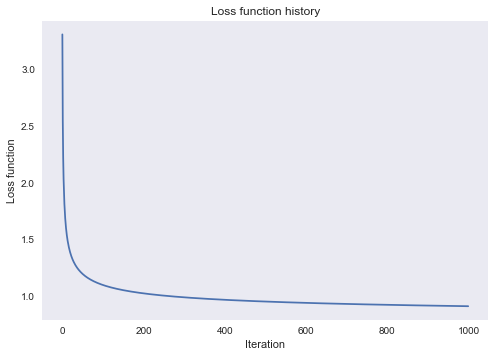

In [23]:
fig, ax = plt.subplots()
ax.plot(cost_history)

ax.set(xlabel='Iteration', ylabel='Loss function',
       title='Loss function history')
ax.grid()

### 3.2.1 Assesing the accuracy of the Model:

In [24]:
beta_gradient = weight_history[cost_history.index(min(cost_history))]
beta_gradient

array([[0.12066272],
       [0.30655754],
       [0.09127633],
       [0.70478141],
       [0.3284655 ],
       [0.5968297 ],
       [0.01927217],
       [0.51069581],
       [0.19748344]])

In [25]:
#Residual sum of squares
RSS = (np.subtract(y_train, X_train.dot(beta_gradient))).T@(np.subtract(y_train, X_train.dot(beta_gradient)))
RSE = RSS/(len(y_train)-2)
RSE

array([[0.939689]])

In [26]:
# Total sum of squares
TSS = np.sum((y_train - np.mean(y_train))**2)

# R-statsitic:
R_statistic = 1- (RSS/TSS)
R_statistic

array([[0.05486832]])

In [27]:
# Adjusted R-statsitic:
Adjusted_RSS = RSS/(len(y_train)-X_train.shape[1])
Adjusted_TSS = TSS/(len(y_train)-1)

R_statistic = 1- (Adjusted_RSS/Adjusted_TSS)
R_statistic

array([[-0.06908337]])

### 3.2.2 Analysis of the test data:

In [28]:
# Residual sum of squares (RSS)
RSS = (np.subtract(y_test, X_test.dot(beta_gradient))).T@(np.subtract(y_test, X_test.dot(beta_gradient)))
RSE = RSS/(len(y_test)-2)
RSE

array([[1.25954825]])

In [29]:
# Total sum of squares
TSS = np.sum((y_train - np.mean(y_train))**2)

# R-statsitic:
R_statistic = 1- (RSS/TSS)
R_statistic

array([[0.47835854]])

In [30]:
# Adjusted R-statsitic:
Adjusted_RSS = RSS/(len(y_train)-X_train.shape[1])
Adjusted_TSS = TSS/(len(y_train)-1)

R_statistic = 1- (Adjusted_RSS/Adjusted_TSS)
R_statistic

array([[0.40994655]])

## 3.3: Maximum likelihood estimation and Inference 

If we want to draw statistical inferences and to study statistical properties of the parameters of a linear regression model, it is necessary to make the following assumptions:

##### <span style="color:#a50e3e;">Assumption 1: </span> Predictors ($x_i$) are known.  That is $x_1, x_2,...,x_n$ are observed values (non-random) of random variables $X_1, X_2,...,X_n$.

##### <span style="color:#a50e3e;">Assumption 2: </span> The conditional distribution of $Y_i$ given observed values of $x_1, x_2,...,x_n$ is a normal distribution.

##### <span style="color:#a50e3e;">Assumption 3: </span> The conditional mean of $Y_i$ given observed values of $x_1, x_2,...,x_n$ is of the form: $E(Y_i|X=x)=\beta_0+  \sum_{j=1}^{p} X_j \beta_j $

##### <span style="color:#a50e3e;">Assumption 4: </span> The conditional variance of  $Y_i$ given observed values of $x_1, x_2,...,x_n$ is constant and equal to $\sigma^2$.

##### <span style="color:#a50e3e;">Assumption 5: </span> The variables  $Y_1,Y_2,...,Y_i$ given observed values of $x_1, x_2,...,x_n$ are independent.


### 3.3.1 Estimation of paramaters:

According to our assumptions $1-5$ the joint distribution of $Y_1,Y_2,...,Y_i$ given observed values of $x_1, x_2,...,x_n$ are normal and their likelihood function is the joint density function:

\begin{equation}
L(\boldsymbol{\beta} = (\beta_0,\beta_1,\dotsc,\beta_n)|X) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}}\mathrm{e}^{(\frac{y_i-\beta_0+ \sum_{j=1}^{p} X_{ij} \beta_j}{2\sigma})^2}=\frac{1}{(2\pi\sigma^2)^\frac{n}{2}}\mathrm{e}^{\sum_{i=1}^{n}(\frac{y_i-\beta_0+\sum_{j=1}^{p} X_j \beta_j}{2\sigma})^2} = \frac{1}{(2\pi\sigma^2)^\frac{n}{2}}\mathrm{e}^{(y-X\beta)^T(y-X\beta)}
\end{equation}

The log-likelihood function:
\begin{equation}
ln(\boldsymbol{\beta} = (\beta_0,\beta_1,\dotsc,\beta_n)|X) = \frac{n}{2}ln(2\pi\sigma^2)-\frac{1}{(2\sigma^2)^2}(y-X\beta)^T(y-X\beta)
\end{equation}


The maximum likelihood estimation can be obtained by equating the first-order derivatives of $L(\boldsymbol{\beta} = (\beta_0,\beta_1,\dotsc,\beta_n)|X)$ with respect to $\boldsymbol{\beta}$ and $\sigma^2$:

\begin{equation}
\hat{\beta} =(\mathrm{X^TX})^{-1}X^Ty 
\end{equation}

\begin{equation}
\sigma^2 = \frac{1}{n}(y-X\beta)^T(y-X\beta)
\end{equation}

$\hat{\beta}$ has a normal distribution because it is a linear function of $Y$ with the following parameters:

\begin{equation}
E(\hat{\beta}) = (\mathrm{X^TX})^{-1}X^TE(Y)= (\mathrm{X^TX})^{-1}X^TE(X\beta+\epsilon) = \beta
\end{equation}

\begin{equation}
Cov(\hat{\beta})=(\mathrm{X^TX})^{-1}X^TCov(Y)X(\mathrm{X^TX})^{-1} = (\mathrm{X^TX})^{-1}X^T\sigma^2 IX(\mathrm{X^TX})^{-1} = \sigma^2(\mathrm{X^TX})^{-1}
\end{equation}


###### 1) Maximum Likelihood Estimation using Gradient descent:

In [92]:
# Negative log-likelihood function
def neg_log_likelihood_function(w):
    beta = w[:-1]
    sigma = w[-1]
    mu = np.dot(X_train,beta)
    log_l = -len(X_train)/2 * np.log(2*np.pi*sigma**2) - (1/(2*sigma**2)) * np.sum((y_train - mu)**2)
    return -1 * log_l

# gradient descent function - inputs: J (loss function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(neg_log_likelihood_function, max_its, alpha=0.01, alpha_decay = 'linear'):
    gradient = value_and_grad(neg_log_likelihood_function)
    w = np.random.rand(X_train.shape[1]+1,1)
    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding loss function history
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_decay == 'exponential':
            alpha_1 = alpha/np.exp(0.1*k)
        elif alpha_decay == 'linear':
            alpha_1 = alpha/(1+k)
        elif alpha_decay == 'quadratic':
            alpha_1 = alpha/(1.0+k)^2.0
        
        # evaluate the gradient, store current (unflattened) weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)
        
        # take gradient descent step
        w = w - alpha_1*grad_eval
    return weight_history, cost_history

In [121]:
weight_history, cost_history = gradient_descent(neg_log_likelihood_function,  max_its=1000, alpha=0.003, alpha_decay ='exponential')

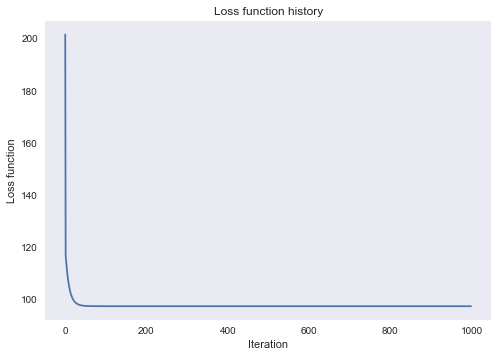

In [122]:
fig, ax = plt.subplots()
ax.plot(cost_history)

ax.set(xlabel='Iteration', ylabel='Loss function',
       title='Loss function history')
ax.grid()

###### 2) Maximum Likelihood Estimation using Scipy optimization:

In [34]:
from scipy.optimize import minimize
# Negative log-likelihood function
def neg_log_likelihood_function(w):
    beta = w[:-1]
    sigma = w[-1]
    mu = np.dot(X_train,beta)
    log_l = -len(X_train)/2 * np.log(2*np.pi*sigma**2) - (1/(2*sigma**2)) * np.sum((y_train - mu)**2)
    return -1 * log_l

def reporter(p):
    """Reporter function to capture intermediate states of optimization."""
    global beta_history
    beta_history.append(p)

In [106]:
w = np.random.rand(X_train.shape[1]+1,1)
beta_history = [w]
beta_scipy = minimize(neg_log_likelihood_function, w, method='BFGS',
               options={'disp': True}, callback=reporter)

print(beta_scipy.x)

Optimization terminated successfully.
         Current function value: 246.806332
         Iterations: 57
         Function evaluations: 780
         Gradient evaluations: 65
[-4.28872878e-03  4.52399461e-09  9.47786521e-07  1.34901432e-06
  1.60862566e-09  9.72728733e-08 -1.94719871e-06 -4.86893259e-08
 -3.38952228e-08  8.22243317e+00]


In [107]:
def cost_history_scipy(beta):
    cost_history = []
    for beta_value in beta:
        cost_history.append(neg_log_likelihood_function(beta_value))
    return cost_history

cost_history_scipy = cost_history_scipy(beta_history)

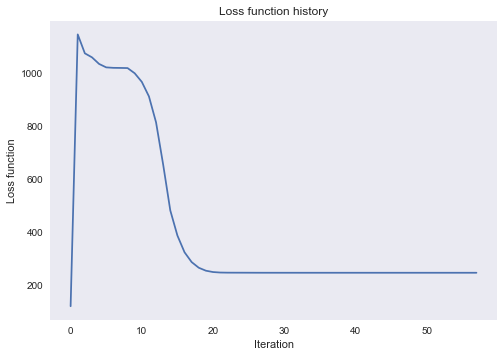

In [108]:
fig, ax = plt.subplots()
ax.plot(cost_history_scipy)

ax.set(xlabel='Iteration', ylabel='Loss function',
       title='Loss function history')
ax.grid()

### 3.3.2 Assesing the accuracy of the Model:

In [123]:
beta_gradient = weight_history[cost_history.index(min(cost_history))][:-1]
beta_scipy = beta_history[-1][:-1][:, np.newaxis]
print(beta_gradient)
print(beta_scipy)

[[ 0.16483162]
 [ 0.31068091]
 [ 0.48330177]
 [ 0.33204968]
 [ 0.18922137]
 [ 0.6715473 ]
 [-0.11122068]
 [ 0.02379048]
 [ 0.70752158]]
[[-4.28872878e-03]
 [ 4.52399461e-09]
 [ 9.47786521e-07]
 [ 1.34901432e-06]
 [ 1.60862566e-09]
 [ 9.72728733e-08]
 [-1.94719871e-06]
 [-4.86893259e-08]
 [-3.38952228e-08]]


In [126]:
#Residual sum of squares
RSS_gradient = (np.subtract(y_train, X_train.dot(beta_gradient))).T@(np.subtract(y_train, X_train.dot(beta_gradient)))
RSE_gradient = RSS_gradient/(len(y_train)-2)
RSS_scipy = (np.subtract(y_train, X_train.dot(beta_scipy))).T@(np.subtract(y_train, X_train.dot(beta_scipy)))
RSE_scipy = RSS_scipy/(len(y_train)-2)
print(RSE_gradient)
print(RSE_scipy)

[[0.92287236]]
[[0.9942414]]


In [127]:
# Total sum of squares
TSS_gradient = np.sum((y_train - np.mean(y_train))**2)
TSS_scipy = np.sum((y_train - np.mean(y_train))**2)

# R-statsitic:
R_statistic_gradient = 1- (RSS_gradient/TSS_gradient)
R_statistic_scipy = 1- (RSS_scipy/TSS_scipy)

print(R_statistic_gradient)
print(R_statistic_scipy)

[[0.07178237]]
[[-4.22729711e-08]]


In [128]:
# Adjusted R-statsitic:
Adjusted_RSS_gradient = RSS_gradient/(len(y_train)-X_train.shape[1])
Adjusted_TSS_gradient = TSS_gradient/(len(y_train)-1)
Adjusted_RSS_scipy = RSS_scipy/(len(y_train)-X_train.shape[1])
Adjusted_TSS_scipy = TSS_scipy/(len(y_train)-1)


R_statistic_gradient = 1- (Adjusted_RSS_gradient/Adjusted_TSS_gradient)
R_statistic_scipy = 1- (Adjusted_RSS_scipy/Adjusted_TSS_scipy)

print(R_statistic_gradient)
print(R_statistic_scipy)


[[-0.04995109]]
[[-0.13114759]]


### 3.3.3 Analysis of the test data:

In [129]:
# Residual sum of squares (RSS)
RSS_gradient = (np.subtract(y_test, X_test.dot(beta_gradient))).T@(np.subtract(y_test, X_test.dot(beta_gradient)))
RSE_gradient = RSS_gradient/(len(y_test)-2)
RSS_scipy = (np.subtract(y_test, X_test.dot(beta_scipy))).T@(np.subtract(y_test, X_test.dot(beta_scipy)))
RSE_scipy = RSS_scipy/(len(y_test)-2)

print(RSE_gradient)
print(RSE_scipy)

[[2.49037871]]
[[1.15690812]]


In [130]:
# Total sum of squares
TSS_gradient = np.sum((y_test - np.mean(y_test))**2)
TSS_scipy = np.sum((y_test - np.mean(y_test))**2)

# R-statsitic:
R_statistic_gradient = 1- (RSS_gradient/TSS_gradient)
R_statistic_scipy = 1- (RSS_scipy/TSS_scipy)

print(R_statistic_gradient)
print(R_statistic_scipy)

[[-1.15302332]]
[[-0.00018931]]


In [131]:
# Adjusted R-statsitic:
Adjusted_RSS_gradient = RSS_gradient/(len(y_test)-X_test.shape[1])
Adjusted_TSS_gradient = TSS_gradient/(len(y_test)-1)
Adjusted_RSS_scipy = RSS_scipy/(len(y_test)-X_test.shape[1])
Adjusted_TSS_scipy = TSS_scipy/(len(y_test)-1)

R_statistic_gradient = 1- (Adjusted_RSS_gradient/Adjusted_TSS_gradient)
R_statistic_scipy = 1- (Adjusted_RSS_scipy/Adjusted_TSS_scipy)

print(R_statistic_gradient)
print(R_statistic_scipy)

[[-1.97322268]]
[[-0.38121381]]


## 3.4: Linear regression using Scikit learn

In [132]:
# Import dependent packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [135]:
# Create linear regression object
regr = LinearRegression()

In [136]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [138]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[ 0.          0.36943802 -0.58919886 -1.09996157 -0.00844192  0.12774492
   1.47569012  0.14636178 -0.2965496 ]]
Mean squared error: 0.74
Coefficient of determination: 0.31


## 3.5: Shrinkage methods

The two popular methods for shrinking the regression coefficients towards zero are Ridge regression and the Lasso. 

### 3.5.1 Ridge regression:

In ridge regression the coefficients are the values that minimize:

\begin{equation}
RSS(\beta) = \sum_{i=1}^{N} (y_i - \sum_{j=1}^{p} X_j \beta_j)^2 + \sum_{j=1}^{p} \lambda \beta_j^2
\end{equation}

An alternative formulation for ridge regression:

\begin{equation}
RSS(\beta) = \sum_{i=1}^{N} (y_i - \sum_{j=1}^{p} X_j \beta_j)^2 
\end{equation}

subject to 

\begin{equation}
\sum_{j=1}^{p}\beta_j^2 \leq s
\end{equation}

where $\lambda$/$s$ is a hyperparameter to be selected separately. When the value of $\lambda$ is too small, the coefficients tend towards zero. The term $\sum_{j=1}^{p} \lambda \beta_j^2$ is called a shrinkage penalty.
In matrix form ridge regression can be written as:

\begin{equation}
RSS(\beta) = (y-X\beta)^T(y-X\beta) + \lambda\beta^T\beta 
\end{equation}

The closed form solution:
\begin{equation}
 \beta^r=(\mathrm{X^TX+\lambda I})^{-1}X^Ty
\end{equation}




**1) Ridge regression using closed-form solution:**

In [50]:
# Ridge regression using closed-form solution
# Paramater estimation:
lamb = 0.1
beta = (linalg.inv(X_train.T@X_train + np.diag(lamb*np.ones(len(X_train[1])))))@X_train.T@y_train
beta

array([[-0.01892908],
       [ 0.3635748 ],
       [-0.40513531],
       [-0.86698843],
       [-0.00869613],
       [ 0.15003562],
       [ 1.14283951],
       [ 0.12947683],
       [-0.29839848]])

**2) Ridge regression using Scipy optimization package:**

In [51]:
from scipy.optimize import minimize
# Function for defining inner product:
def inner_product(X_train,b):
    d = np.dot(X_train,b)
    return d

# least squares cost function for linear regression
def least_squares_function(b):    
    # compute the least squares cost
    cost = np.sum((inner_product(X_train,b) - y_train)**2)
    return cost/float(y_train.size)

def reporter(p):
    """Reporter function to capture intermediate states of optimization."""
    global beta_history
    beta_history.append(p)

In [52]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(w[1:]**2)-1})
w = np.random.rand(X_train.shape[1],1)
beta_history = [w]
beta_scipy = minimize(least_squares_function, w, method='BFGS',
               options={'disp': True}, constraints=cons, callback=reporter)

print(beta_scipy.x)

Optimization terminated successfully.
         Current function value: 67.608412
         Iterations: 13
         Function evaluations: 209
         Gradient evaluations: 19
[-4.28868218e-03  4.51794110e-08 -4.31446520e-08  2.82661766e-07
  4.54181759e-08  3.21543615e-08 -1.48483855e-07  1.21306481e-07
 -8.87737561e-08]


C:\Users\NysanAskar\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


In [53]:
def cost_history_scipy(beta):
    cost_history = []
    for beta_value in beta:
        cost_history.append(least_squares_function(beta_value))
    return cost_history

cost_history_scipy = cost_history_scipy(beta_history)

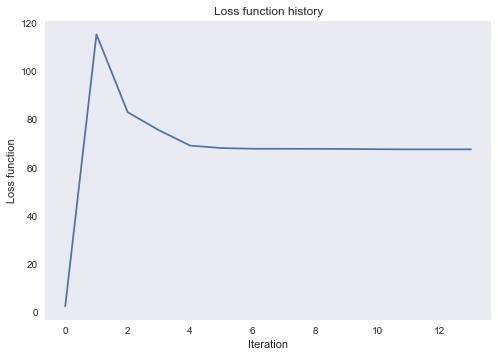

In [54]:
fig, ax = plt.subplots()
ax.plot(cost_history_scipy)

ax.set(xlabel='Iteration', ylabel='Loss function',
       title='Loss function history')
ax.grid()

In [55]:
# Function for variuos values of tuning parameters lambda
lamb = np.arange(0,50,1) 
beta_list = [[] for _ in range(len(w[1:]))] 
for l in lamb:
    cons = ({'type': 'eq', 'fun': lambda x: np.sum(w[1:]**2)-l})
    w = np.random.rand(X_train.shape[1],1)
    beta_scipy = minimize(least_squares_function, w, method='BFGS', options={'disp': True}, 
                              constraints=cons, callback=reporter)
    for b in range(len(w[1:])): 
        beta_list[b].append(beta_scipy.x[1+b])

C:\Users\NysanAskar\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


Optimization terminated successfully.
         Current function value: 67.608412
         Iterations: 15
         Function evaluations: 220
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 67.608412
         Iterations: 13
         Function evaluations: 187
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 67.608412
         Iterations: 13
         Function evaluations: 198
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 67.608412
         Iterations: 13
         Function evaluations: 187
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 67.608412
         Iterations: 14
         Function evaluations: 209
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 67.608412
         Iterations: 14
         Function evaluat

In [56]:
beta_coefficients = pd.DataFrame(beta_list).T
beta_coefficients.columns=list(Seoul_bike.iloc[:, 2:10].columns)

Text(0, 0.5, 'Coefficients')

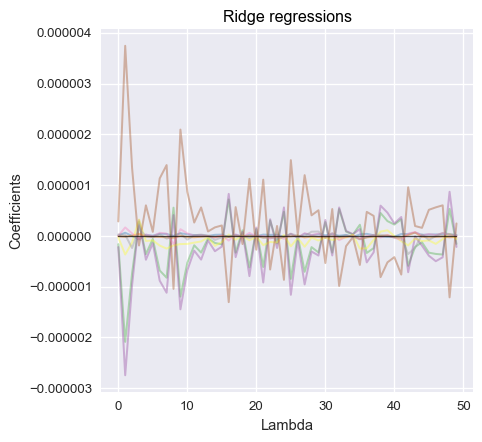

In [57]:
palette = plt.get_cmap('Set1')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# multiple line plot
num=0
for column in beta_coefficients:
    num+=1
    plt.plot(beta_coefficients.index, beta_coefficients[column], marker='', color=palette(num), linewidth=1.5, alpha=0.4)
plt.plot(beta_coefficients.index, np.zeros((50)), marker='', color='black', linewidth=1, alpha=0.7)
# Add titles
plt.title("Ridge regressions", loc='center', fontsize=12, fontweight=0, color='black')
plt.xlabel("Lambda")
plt.ylabel("Coefficients")

### 3.5.2 Lasso regression:

In ridge regression the penalty term $\sum_{j=1}^{p} \lambda \beta_j^2$ will decrease all the coefficients towards zero but it will not set any of them exactly to zero. On the other hand lasso regression will shrink some of the coefficients exactly to zero. 

\begin{equation}
RSS(\beta) = \sum_{i=1}^{N} (y_i - \sum_{j=1}^{p} X_j \beta_j)^2 + \sum_{j=1}^{p} \lambda |\beta_j|
\end{equation}

An alternative formulation for lasso regression:

\begin{equation}
RSS(\beta) = \sum_{i=1}^{N} (y_i - \sum_{j=1}^{p} X_j \beta_j)^2 
\end{equation}

subject to 

\begin{equation}
\sum_{j=1}^{p}|\beta_j| \leq s
\end{equation}

where $\lambda$/$s$ is a hyperparameter to be selected separately. When the value of $\lambda$/$s$ is too small, some of the coefficients will be zero.

**1) Lasso regression using Scipy optimization package:**

In [58]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(np.absolute(w[1:]))-1})
w = np.random.rand(X_train.shape[1],1)
beta_history = [w]
beta_scipy = minimize(least_squares_function, w, method='BFGS',
               options={'disp': True}, constraints=cons, callback=reporter)

print(beta_scipy.x)

Optimization terminated successfully.
         Current function value: 67.608412
         Iterations: 14
         Function evaluations: 231
         Gradient evaluations: 21
[-4.28867822e-03  2.51560141e-08 -4.73010675e-07 -6.58522481e-07
 -2.35920183e-08 -1.68258841e-07  7.82584912e-07  1.35624373e-08
 -7.58211474e-08]


C:\Users\NysanAskar\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


In [59]:
def cost_history_scipy(beta):
    cost_history = []
    for beta_value in beta:
        cost_history.append(least_squares_function(beta_value))
    return cost_history

cost_history_scipy = cost_history_scipy(beta_history)

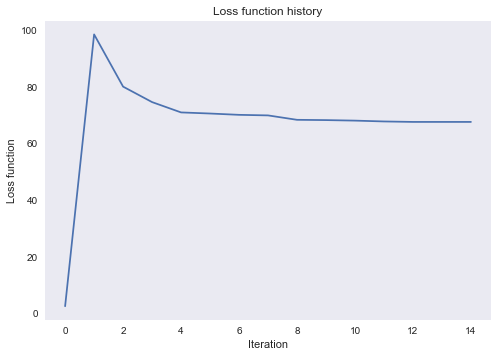

In [60]:
fig, ax = plt.subplots()
ax.plot(cost_history_scipy)

ax.set(xlabel='Iteration', ylabel='Loss function',
       title='Loss function history')
ax.grid()

In [61]:
# Function for variuos values of tuning parameters lambda
lamb = np.arange(0,2,0.2) 
beta_list = [[] for _ in range(len(w[1:]))] 
for l in lamb:
    cons = ({'type': 'eq', 'fun': lambda x: np.sum(np.absolute(w[1:]))-1})
    w = np.random.rand(X_train.shape[1],1)
    beta_scipy = minimize(least_squares_function, w, method='BFGS', options={'disp': True}, 
                              constraints=cons, callback=reporter)
    for b in range(len(w[1:])): 
        beta_list[b].append(beta_scipy.x[1+b])

Optimization terminated successfully.
         Current function value: 67.608412
         Iterations: 13
         Function evaluations: 198
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 67.608412
         Iterations: 13
         Function evaluations: 209
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 67.608412
         Iterations: 14
         Function evaluations: 209
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 67.608412
         Iterations: 14
         Function evaluations: 209
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 67.608412
         Iterations: 14
         Function evaluations: 220
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 67.608412
         Iterations: 13
         Function evaluat

C:\Users\NysanAskar\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


In [62]:
beta_coefficients = pd.DataFrame(beta_list).T
beta_coefficients.columns=list(Seoul_bike.iloc[:, 2:10].columns)

Text(0, 0.5, 'Coefficients')

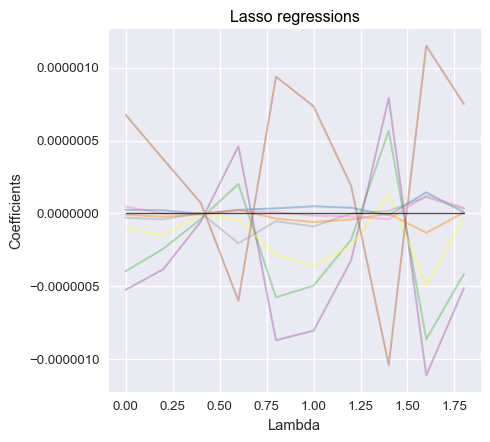

In [63]:
palette = plt.get_cmap('Set1')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# multiple line plot
num=0
for column in beta_coefficients:
    num+=1
    plt.plot(lamb, beta_coefficients[column], marker='', color=palette(num), linewidth=1.5, alpha=0.4)
plt.plot(lamb, np.zeros((10)), marker='', color='black', linewidth=1, alpha=0.7)
# Add titles
plt.title("Lasso regressions", loc='center', fontsize=12, fontweight=0, color='black')
plt.xlabel("Lambda")
plt.ylabel("Coefficients")

### 3.5.3 Elastic-net penalty:

In elastic-net the penalty term has the following form:

\begin{equation}
RSS(\beta) = \sum_{i=1}^{N} (y_i - \sum_{j=1}^{p} X_j \beta_j)^2 + \sum_{j=1}^{p} \lambda (\alpha
\beta_j^2 + (1-\alpha)|\beta_j| )
\end{equation}

An alternative formulation for lasso regression:

\begin{equation}
RSS(\beta) = \sum_{i=1}^{N} (y_i - \sum_{j=1}^{p} X_j \beta_j)^2 
\end{equation}

subject to 

\begin{equation}
\sum_{j=1}^{p} \lambda (\alpha \beta_j^2 + (1-\alpha)|\beta_j| ) \leq s
\end{equation}

where $\lambda$/$s$ is a hyperparameter to be selected separately. The elastic-net selects variables like the lass, and shrinks the coefficients of correlated variables like ridge penalty.

In [64]:
alpha = 0.1
cons = ({'type': 'eq', 'fun': lambda x: np.sum(alpha*w[1:]+(1-alpha)*np.absolute(w[1:]))-1})
w = np.random.rand(X_train.shape[1],1)
beta_history = [w]
beta_scipy = minimize(least_squares_function, w, method='BFGS',
               options={'disp': True}, constraints=cons, callback=reporter)

print(beta_scipy.x)

Optimization terminated successfully.
         Current function value: 67.608412
         Iterations: 14
         Function evaluations: 209
         Gradient evaluations: 19
[-4.28866167e-03  8.02231001e-09 -1.86891094e-08 -8.97942390e-08
 -2.21614534e-08 -7.95422761e-08  1.68517491e-09 -2.47243158e-08
 -1.66051909e-08]


C:\Users\NysanAskar\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


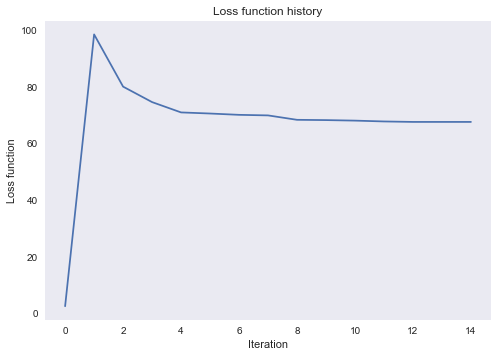

In [65]:
fig, ax = plt.subplots()
ax.plot(cost_history_scipy)

ax.set(xlabel='Iteration', ylabel='Loss function',
       title='Loss function history')
ax.grid()

In [66]:
# Function for variuos values of tuning parameters lambda
lamb = np.arange(0,10,0.5) 
beta_list = [[] for _ in range(len(w[1:]))] 
for l in lamb:
    cons = ({'type': 'eq', 'fun': lambda x: np.sum(np.absolute(w[1:]))-1})
    w = np.random.rand(X_train.shape[1],1)
    beta_scipy = minimize(least_squares_function, w, method='BFGS', options={'disp': True}, 
                              constraints=cons, callback=reporter)
    for b in range(len(w[1:])): 
        beta_list[b].append(beta_scipy.x[1+b])

C:\Users\NysanAskar\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


Optimization terminated successfully.
         Current function value: 67.608412
         Iterations: 14
         Function evaluations: 198
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 67.608412
         Iterations: 15
         Function evaluations: 220
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 67.608412
         Iterations: 14
         Function evaluations: 231
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 67.608412
         Iterations: 14
         Function evaluations: 209
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 67.608412
         Iterations: 14
         Function evaluations: 198
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 67.608412
         Iterations: 14
         Function evaluat

In [67]:
beta_coefficients = pd.DataFrame(beta_list).T
beta_coefficients.columns=list(Seoul_bike.iloc[:, 2:10].columns)

Text(0, 0.5, 'Coefficients')

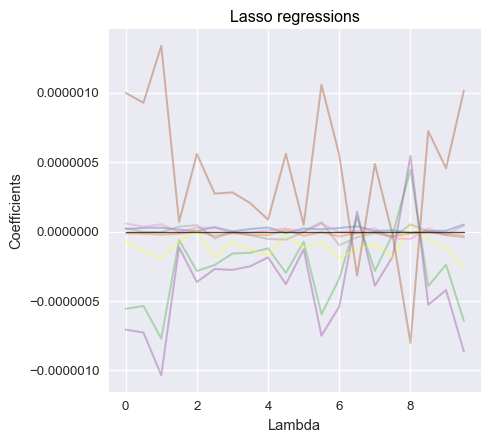

In [68]:
palette = plt.get_cmap('Set1')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# multiple line plot
num=0
for column in beta_coefficients:
    num+=1
    plt.plot(lamb, beta_coefficients[column], marker='', color=palette(num), linewidth=1.5, alpha=0.4)
plt.plot(lamb, np.zeros((20)), marker='', color='black', linewidth=1, alpha=0.7)
# Add titles
plt.title("Lasso regressions", loc='center', fontsize=12, fontweight=0, color='black')
plt.xlabel("Lambda")
plt.ylabel("Coefficients")

## 3.6: Methods using Derived input directions

### 3.6.1: Principal Components Regression

Our data have already been normalized so we need not do it again. As we know from linear algebra singular value decomposition (SVD) can be applied to any matrix:

\begin{equation}
X=UDV^T
\end{equation}

where:
* $X$ is $n\times p$ matrix of observations,
* $U$ is $n\times n$ matrix, that is orthonormal basis of column space of $X$,
* $D$ is $p\times p$ diagonal matrix, with diagonal entries $\lambda_i,...,\lambda_p$ which are singular values of $X$,
* $U$ is $p\times p$ matrix, that is orthonormal basis of row space of $X$.

\begin{equation}
X\hat{\beta^{ls}}=X(X^TX)^{-1}X^Ty=UDV^T(VDU^TUDV^T)^{-1}(UDV^T)^Ty=UDV^T(VDDV^T)^{-1}VDU^Ty=UDV^T(V^T)^{-1}D^{-1}D^{-1}V^{-1}VDU^Ty=UDD^{-1}D^{-1}DU^Ty=UU^Ty
\end{equation}

For ridge regression we obtain (the following formula is given just for the purpose of observing additional insight into the nature of ridge regression):
\begin{equation}
X\hat{\beta^{ls}}=X(X^TX+\lambda I)^{-1}X^Ty=UD(D^2+\lambda I)^{-1}DU^Ty=\sum_{j=1}^{p}u_j\frac{d_j^2}{d_j^2+\lambda}u_j^Ty
\end{equation}

The term $\frac{d_j^2}{d_j^2+\lambda}$ means that ridge regression mostly shrinks the principal components with small variances.

Covariance matrix $C$ can be obtained:

\begin{equation}
C=\frac{X^TX}{n}
\end{equation}

Any covariance matrix is symmetric and according to the spectral theorem from linear algebra any symmetric matrix is diagonalizable and positive-semidefinite:

\begin{equation}
C=Z\Delta Z^T
\end{equation}

\begin{equation}
CZ=Z\Delta
\end{equation}

\begin{equation}
Z^TCZ=\Delta
\end{equation}

\begin{equation}
\Delta=Z^T\frac{X^TX}{n}Z
\end{equation}

\begin{equation}
\Delta=\frac{(XZ)^T(XZ)}{n}=\frac{(D)^T(D)}{n}
\end{equation}
where $D$ is a new matrix of uncorrelated principal components with variances $d_1,d_2,...d_p$. Thus new prinicpal components can be evaluated $XZ$, where $Z$ is a matrix of eigenvectors of covariance matrix $C$. The diagonal matrix $\Delta$ is the new covariance matrix of the transformed data $D=XZ$. In other words, the new matrix represents a decorrelated cersion of the data.


In [69]:
# Covariance matrix of the observed data
C = (X_train[:,1:].T@X_train[:,1:])/len(X_train[:,1:])

# Singular value decomposition of the Covariance matrix
Z,s,V = linalg.svd(C)

#Principal components
D  = X_train[:,1:]@Z

Text(0, 0.5, 'The cumulative variances')

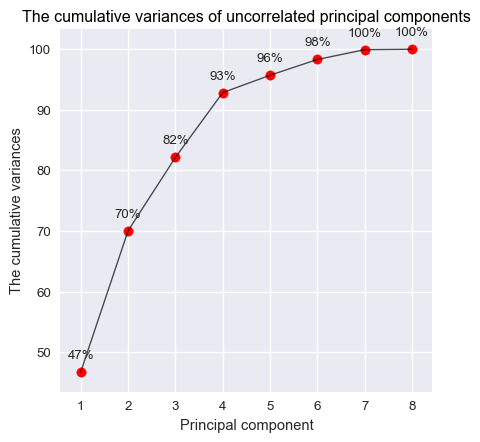

In [70]:
# Plot singular values against principal components
Variance_proportion = [s[0]/(np.sum(s))*100]
for i in range(1,len(s)):
    Variance_proportion.append((s[i]/(np.sum(s))*100)+np.sum(Variance_proportion[i-1]))
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
plt.plot(np.arange(1,9), Variance_proportion, marker='', color='black', linewidth=1, alpha=0.7)
plt.scatter(np.arange(1,9), Variance_proportion,s=50,color='red')

for x,y in zip(np.arange(1,9), Variance_proportion):
    label = "{:.0f}%".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
# Add titles
plt.title("The cumulative variances of uncorrelated principal components", loc='center', fontsize=12, fontweight=0, color='black')
plt.xlabel("Principal component")
plt.ylabel("The cumulative variances")

As we can see from the above plot the four principal components explain about 92% of variation of the data, so in our regression analysis we use these components.

In [71]:
#Select Principal components with largest eigenvlues
D_principal_components  = X_train[:,1:]@Z[:,:4]

In [72]:
# Construct dataframe from partial least squares variables
principal_components = pd.DataFrame(D_principal_components)
y_train_data = pd.DataFrame(y_train)
principal_components_data = pd.concat([principal_components, y_train_data], axis=1)
principal_components_data.columns = [1,2,3,4, 'y_variable']

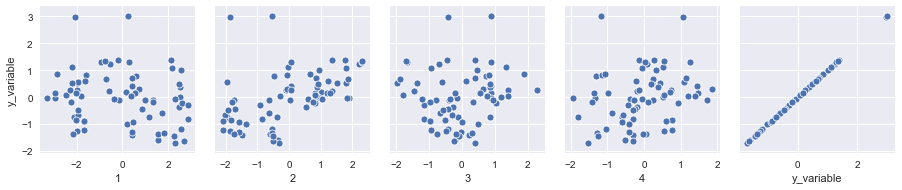

In [73]:
# Plot principal components against dependent varible 
sns.pairplot(principal_components_data, y_vars="y_variable", x_vars=principal_components_data.columns.values)

In [74]:
# Paramater estimation:
beta = (linalg.inv(D_principal_components.T@D_principal_components))@D_principal_components.T@y_train
beta

array([[-0.1093105 ],
       [ 0.36355403],
       [ 0.09620562],
       [ 0.27610487]])

In [75]:
# Residual sum of squares (RSS)
RSS = (np.subtract(y_train, D_principal_components.dot(beta))).T@(np.subtract(y_train, D_principal_components.dot(beta)))
RSS

array([[44.59826073]])

### 3.6.2 Assesing the accuracy of the Model:

In [76]:
RSE = RSS/(len(y_train)-2)
RSE

array([[0.65585678]])

In [77]:
# Total sum of squares
TSS = np.sum((y_train - np.mean(y_train))**2)

# R-statsitic:
R_statistic = 1- (RSS/TSS)
R_statistic

array([[0.3403445]])

In [78]:
# Adjusted R-statsitic:
Adjusted_RSS = RSS/(len(y_train)-X_train.shape[1])
Adjusted_TSS = TSS/(len(y_train)-1)

R_statistic = 1- (Adjusted_RSS/Adjusted_TSS)
R_statistic

array([[0.25383231]])

### 3.6.2: Partial Least Squares

We can compute Partial least squares in two ways as given in ELS book. <br>
1) Standardize each $x_j$. Set $\hat{y}^{(0)} = \bar{y}1$, and $x_j^{(0)}=x_j, j=1,2,...,p.$ <br>
2) For m=1,2,...,p <br>
>(a) $ z_m $ = $\sum_{j=1}^{p} \hat{\varphi_{mj}}X_j^{m-1}$, where $ \hat{\varphi_{mj}} = <X_j^{m-1},y>$. <br>
(b) $ \hat{\theta_m}=\frac{<z_m,y>}{<z_m,z_m>}$. <br>
(c) $ \hat{y}^{(m)}= \hat{y}^{(m-1)}+\hat{\theta_m}z_m$. <br>
(d) $ x_j^{(m)}=x_j^{(m-1)}-[\frac{<z_m,x_j^{(m-1)}>}{<z_m,z_m>}]z_m, j=1,2,...,p $</blockquote>

In [79]:
# Data without intersept term (the first column of ones)
X_train_obs = X_train[:,1:].copy()

In [80]:
y_fitted = np.zeros(shape=(len(X_train_obs),X_train_obs.shape[1]))
X_train_fitted = np.zeros(shape=(X_train_obs.shape[1]+1,len(X_train_obs),X_train_obs.shape[1]))
z_PLS_variable = np.zeros(shape=(len(X_train_obs),X_train_obs.shape[1]))
PLS_coeff = np.zeros(shape=(X_train_obs.shape[1]+1))
phi_coeff = np.zeros(shape=(X_train_obs.shape[1]+1,X_train_obs.shape[1]))

In [81]:
y_fitted[:,0] = np.mean(y_train)
X_train_fitted[0] = X_train_obs

In [82]:
for m in range(1,X_train_obs.shape[1]+1):
    for j in range(X_train_obs.shape[1]):
        phi_coeff[m][j] = np.dot(X_train_fitted[m-1][:,j],y_train)
    z_PLS_variable[:, m-1:m] = X_train_fitted[m-1]@phi_coeff[m,np.newaxis].T
    PLS_coeff[m] = (np.dot(z_PLS_variable[:,m-1:m].T,y_train)/np.dot(z_PLS_variable[:,m-1:m].T,z_PLS_variable[:,m-1:m]))[0][0]
    if m == 1:
        y_fitted[:,m-1:m] = np.full((len(X_train_obs), 1), np.mean(y_train)) + PLS_coeff[m]*z_PLS_variable[:,m-1:m]
    else:
        y_fitted[:,m-1:m] = y_fitted[:,m-2:m-1] + PLS_coeff[1]*z_PLS_variable[:,m-1:m]
    X_train_fitted[m] = X_train_fitted[m-1] - (np.dot(z_PLS_variable[:,m-1:m].T,X_train_fitted[m-1])/np.dot(z_PLS_variable[:,m-1:m].T,z_PLS_variable[:,m-1:m]))*z_PLS_variable[:,m-1:m]

In [83]:
RSS = (np.subtract(y_train, z_PLS_variable.dot(PLS_coeff[1:, np.newaxis]))).T@(np.subtract(y_train, z_PLS_variable.dot(PLS_coeff[1:, np.newaxis])))
RSE = RSS/(len(y_train)-2)
print("RSE:", RSE)
# Total sum of squares
TSS = np.sum((y_train - np.mean(y_train))**2)
# R-statsitic:
R_statistic = 1- (RSS/TSS)
print("R^2:", R_statistic)
# Adjusted R-statsitic:
Adjusted_RSS = RSS/(len(y_train)-X_train_obs.shape[1])
Adjusted_TSS = TSS/(len(y_train)-1)
R_statistic = 1- (Adjusted_RSS/Adjusted_TSS)
print("Adjusted R^2:",R_statistic)

RSE: [[0.62050556]]
R^2: [[0.37590048]]
Adjusted R^2: [[0.30543763]]


In [84]:
# Construct dataframe from partial least squares variables
PLS_variable = pd.DataFrame(z_PLS_variable)
y_train_data = pd.DataFrame(y_train)
PLS_data = pd.concat([PLS_variable, y_train_data], axis=1)
PLS_data.columns = [1,2,3,4,5,6,7,8, 'y_variable']

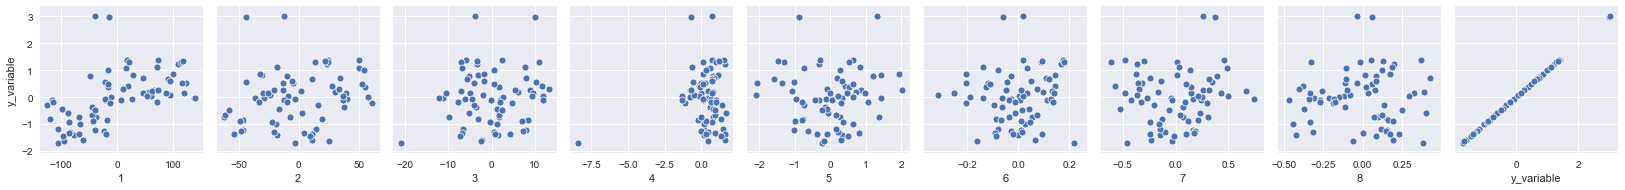

In [85]:
# Plot partial least squares vaariables agaisnt dependent varible 
sns.pairplot(PLS_data, y_vars="y_variable", x_vars=PLS_data.columns.values)

**2. PLS algoritm with scikit learn:**

In [86]:
from sklearn.cross_decomposition import PLSRegression
pls2 = PLSRegression(n_components=2)
pls2.fit(X_train_obs, y_train)
R_statistic = pls2.score(X_train_obs, y_train)
print("R^2:", R_statistic)

R^2: 0.34928923741625817


## 3.7: The Lasso and Related path algoritms

### 3.7.1: Incremental forward stagewise regression:
1. Start with the residual $r$ equal to $y$ and $\beta_1, \beta_2,...,\beta_p=0.$ All the predictors are standardized to have mean zero and unit norm.
2. Find the predictor $x_j$ most correlated with $r$.
3. Update $\beta_j \leftarrow \beta_j + \sigma_j$, where $\sigma_j = \epsilon*sign[<x_j,r>]$ and $\epsilon>0$ is a small step size, and set $r\leftarrow r-\sigma_jx_j$
4. Repeat steps 2 and 3 many times, until the residuals are uncorrelated.

In [140]:
residual_var = y_train.copy()
beta_coef = np.zeros(shape=(X_train_obs.shape[1])).copy()
epsilon = 0.01
tolerance_number = 0.001

In [141]:
max_corr = np.max(X_train_obs.T@residual_var)
n = 0
weight_history = []
while max_corr >= tolerance_number:
    max_corr = np.max(X_train_obs.T@residual_var)
    max_var = np.argmax(X_train_obs.T@residual_var)
    beta_coef[max_var] = beta_coef[max_var] + epsilon*np.sign(max_corr)
    residual_var = residual_var - epsilon*np.sign(max_corr)*X_train_obs[:,max_var:max_var+1]
    weight_history.append(beta_coef.copy())
    n = n + 1

In [142]:
beta_coefficients_FS = pd.DataFrame(weight_history)
beta_coefficients_FS.columns=list(Seoul_bike.iloc[:, 2:10].columns)

Text(0, 0.5, 'Coefficients')

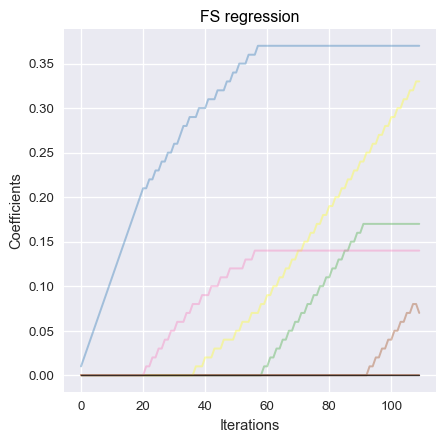

In [144]:
palette = plt.get_cmap('Set1')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# multiple line plot
num=0
for column in beta_coefficients_FS:
    num+=1
    plt.plot(beta_coefficients_FS.index, beta_coefficients_FS[column], marker='', color=palette(num), linewidth=1.5, alpha=0.4)
plt.plot(beta_coefficients_FS.index, np.zeros((110)), marker='', color='black', linewidth=1, alpha=0.7)
# Add titles
plt.title("FS regression", loc='center', fontsize=12, fontweight=0, color='black')
plt.xlabel("Iterations")
plt.ylabel("Coefficients")